In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Midterm assignment
## Part 1 - Following the slides

Firstly the dataset needs to be loaded, and I want to print out the features to see what is in it

In [102]:
df = pd.read_csv("housing.csv")
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


Next I want to describe the features to further show the dataset

In [103]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Now we need to use info to show the features counts and their data type

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Here we use value counts to get the amount of different categorical data in the ocean proximity feature

In [105]:
df["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

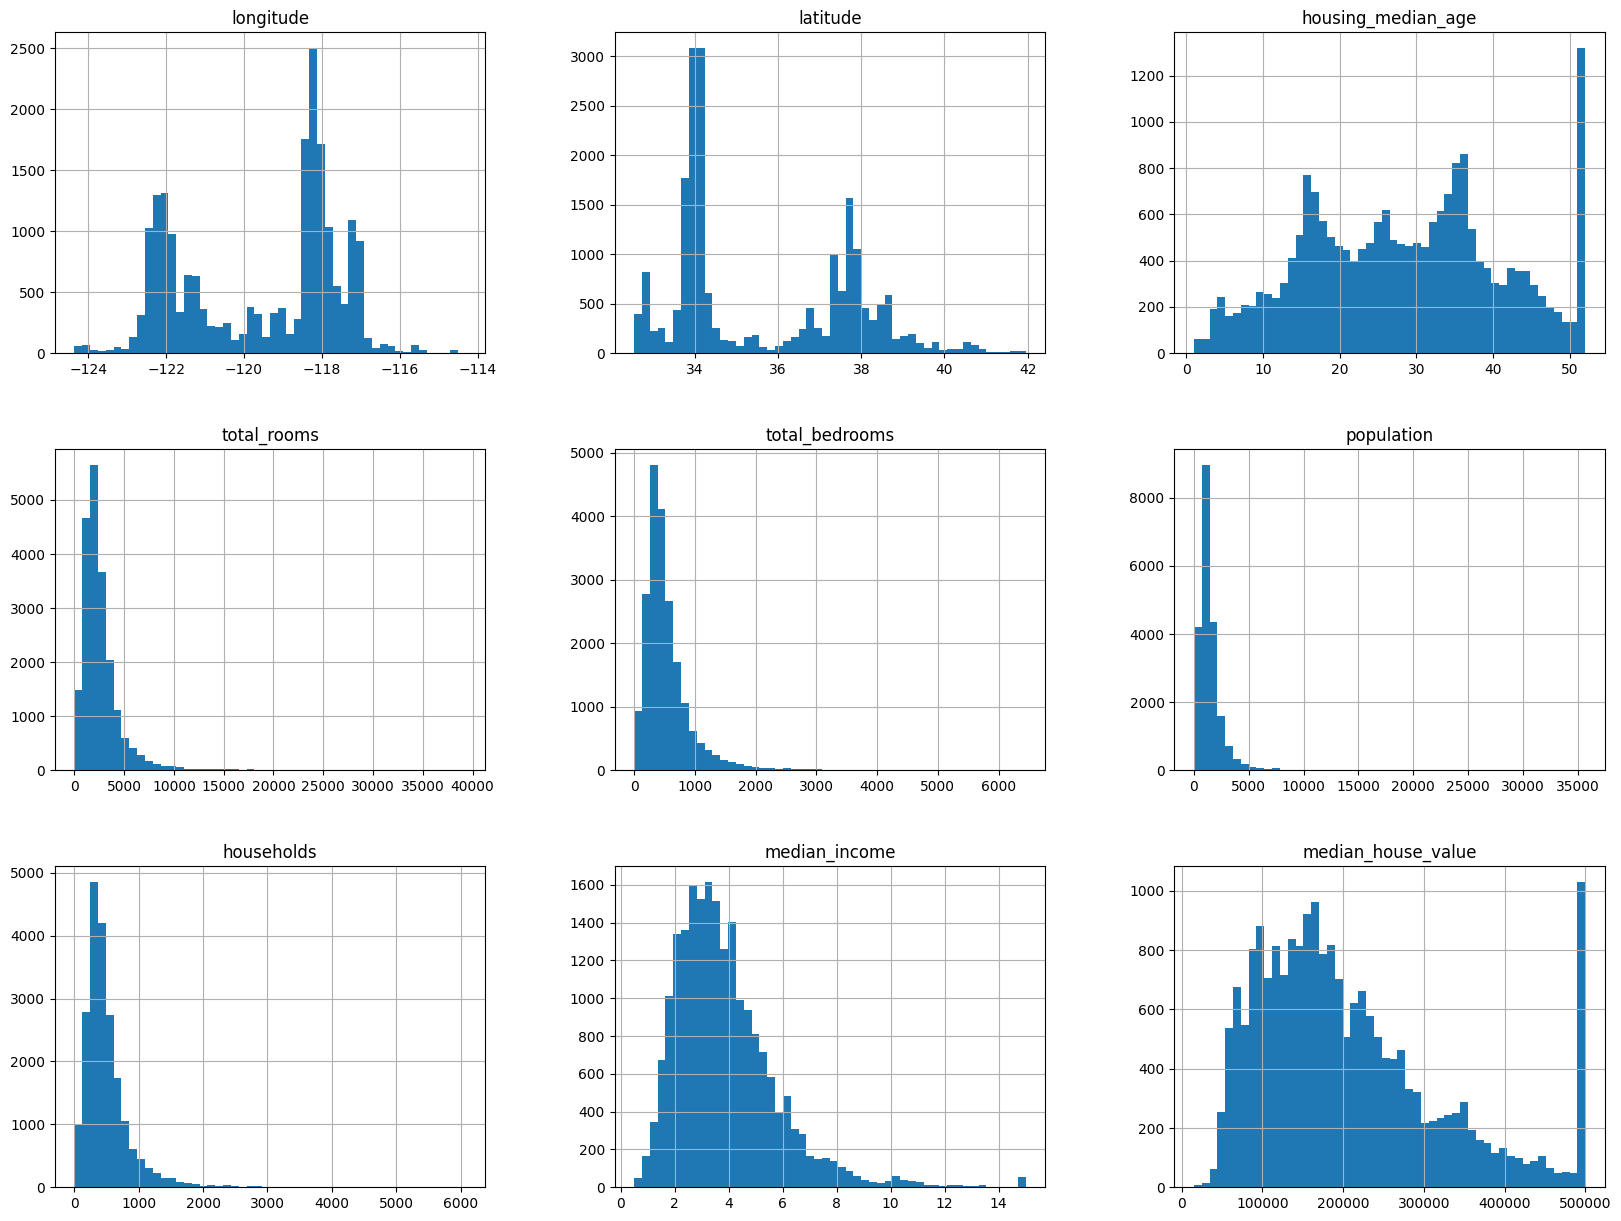

In [106]:
df.hist(bins =50, figsize =(20,15))
plt.show()

The axis on these graphs are confusing in many places like what does y axis mean for median house value or what does the x axis mean for median income. Because of this im struggling to find what these graphs really mean, and if they show anything at all?

Next we need to split the data into test and training. I think that median house value is the best target because this dataset looks like its using certain features of houses to predict the price.

In [107]:
X = df.drop(columns=["median_house_value"])  # Features
y = df["median_house_value"]  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (16512, 9)
Shape of X_test: (4128, 9)
Shape of y_train: (16512,)
Shape of y_test: (4128,)


Now its time to view the data

<Axes: xlabel='longitude', ylabel='latitude'>

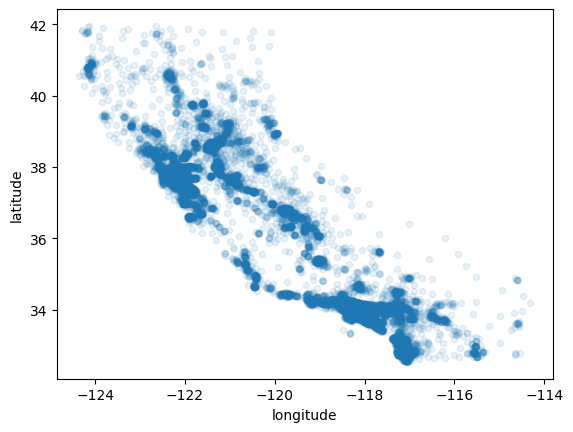

In [108]:
df.plot(kind="scatter" , x= "longitude", y = "latitude", alpha=0.1)

This graph with the alpha parameter shows the density of points with helps us find groups like those in bottom right. The might tell us that in the area with longitude -118 and latitude 34 a lot of houses are for sale.

Next we should print a correlation matrix

In [109]:
# Drop the categorical column from X
X_excluded_categorical = X.drop(columns=['ocean_proximity'])

# Calculate the correlation matrix
correlation_matrix = X_excluded_categorical.corr()
correlation_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000


In [110]:
correlation_matrix = df.corr(numeric_only=True)
correlation_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

This shows the most important features for the median house value and the output does make sense logically. Median income and total rooms being so high make a lot of sense, and other total amount features show a smaller but still positive correlation.

Next we need to encode the ocean proximity feature to get all features numerical

In [111]:
X_encoded = pd.get_dummies(X, columns=['ocean_proximity'], drop_first=True)

# Multicollinearity means that two or more features in the dataset are highly correlated with each other
# This means one feature can be predicted from the other with a degree of accuracy

# Print the encoded DataFrame
X_encoded.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,False,False,True,False


This is the new dataframe with the ocean proximity feature being split into boolean values of the possible entry's. A possible problem is that the new features are booleans not numerical so if we try to run a linear regression on the data its not going to work. What we should do is convert the false values to 0 and the true values to 1.

In [112]:
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# Assuming X_train, X_test, y_train, and y_test are already defined
# Create a linear regression model
# model = LinearRegression()
# Train the model on the training data
# model.fit(X_train, y_train)
# Make predictions on the testing data
# y_pred = model.predict(X_test)

# Evaluate the model's performance
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error:", mse)

This code does not run and gives a lot of problems because we didn't properly clean and process the data, so now we need to fix that.

In [113]:
# First im going to load the dataset into a new variable to reset
housing = pd.read_csv("housing.csv")

# Next im going to check for null values
columns_to_check = housing.columns.difference(['ocean_proximity'])
print("Columns with nulls (Not ocean proximity): ")
print(housing[columns_to_check].columns[housing[columns_to_check].isna().any()])

Columns with nulls (Not ocean proximity): 
Index(['total_bedrooms'], dtype='object')


This shows that total bedrooms has some nulls, so now we should fill those nulls with the mean of the column. This works because its a numerical column.

In [114]:
column_name = 'total_bedrooms'
housing[column_name] = housing[column_name].fillna(housing[column_name].mean())

print("Nulls in '{}' column after filling: ".format(column_name))
print(housing[column_name][housing[column_name].isna()])

Nulls in 'total_bedrooms' column after filling: 
Series([], Name: total_bedrooms, dtype: float64)


Now that the null values are gone we can one hot encode the ocean proximity column and start to run predictions

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# One-hot encode the 'ocean_proximity' column
housing_encoded = pd.get_dummies(housing, columns=['ocean_proximity'], prefix='ocean_proximity', dtype=int)

# Split the data into features (X) and target variable (y)
X = housing_encoded.drop(columns=['median_house_value'])
y = housing_encoded['median_house_value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model's performance using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 4904399775.949286


In [116]:
rsne = np.sqrt(mse)
rsne

np.float64(70031.41991955672)

An error of 70,031.42 shows that the predication is off by around 70 thousand dollars. This can be very bad for some of the cheaper homes in the dataset but for the more expensive houses this error can be acceptable, but overall this error shows that the model is starting to understand patterns but needs a lot more improvement.

## Part 2 - Encoding and Analyzing the prediction

One hot coding is a way to convert categorical features into numeric features, and is used because prediction algorithms usually only take in numerical input. This can be seen in this dataset with the feature ocean_proximity.

In [117]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

This shows what values are in the feature, and also shows why we need to encode because how is a algorithm going to predict using these different text features. So we need to fix it with one hot encoding. How one hot encoding works is that for example in the feature ocean proximity it takes all different entry's and makes them there own features and if the feature was present then a 1 is recorded and if not a 0 is recorded.

In [118]:
housing_encoded = pd.get_dummies(housing, columns=['ocean_proximity'], prefix='ocean_proximity', dtype=int)
housing_encoded

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


You can see what I mean here with ocean proximity being made into 5 new columns and each one is numerical. This works great when you have one or two simple features, but if you have a large dataset with a lot of categorical features one hot encoding would make the dataset way to big to process. One hot encoding works, but should be used when you don't have a lot of possible values to convert.

After looking at the documentation of the get_dummies function I think the big o of it is O(n * k) with n being the number of rows and k being the possible unique categories in the feature.

Next I want to try and improve my prediction and analyze it

Firstly I want to make a graph to show my prediction in a better way than just text

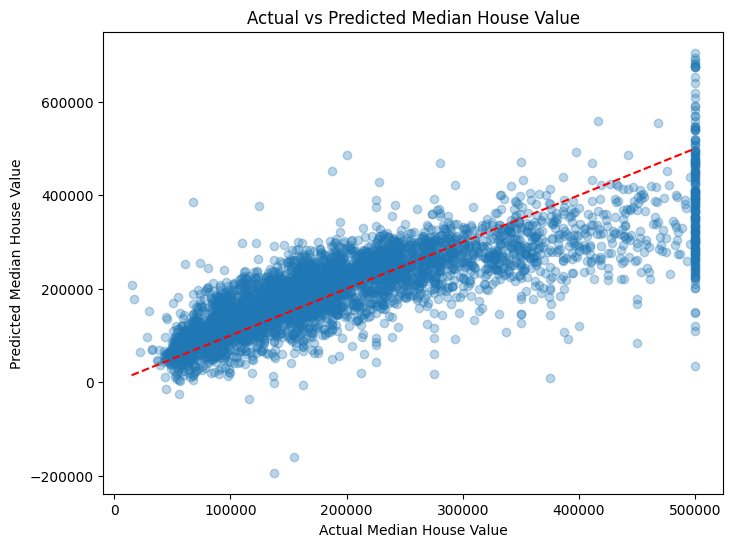

In [119]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted Median House Value")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.show()

Looking at the graph helps explain the predication error a lot better. You can see the predication is pretty actuate in the low to medium priced houses, but starts to struggle a lot when the houses become more expensive. This shows that using a linear regression model might not be the best option here because the relationship between the target and features are not a straight line.

To try and improve my prediction I want to try feature engineering and standard scaling to see if I can get the rnse up.

In [120]:
# Feature Engineering
housing_encoded['rooms_per_household'] = housing_encoded['total_rooms'] / housing_encoded['households']
housing_encoded['bedrooms_per_room'] = housing_encoded['total_bedrooms'] / housing_encoded['total_rooms']
housing_encoded['population_per_household'] = housing_encoded['population'] / housing_encoded['households']

# Print out dataset with new features
housing_encoded

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0,5.329513,0.219892,2.123209


Here I made three new feature rooms_per_household, bedrooms_per_rooms, and population_per_household all which seemed like good ideas to me because I think of this type of info when I think of things I would want to know before buying a house, and I couldn't come up with a lot of other options.

In [121]:
# Split the data into features (X) and target variable (y)
X1 = housing_encoded.drop(columns=['median_house_value'])
y1 = housing_encoded['median_house_value']

# Split the data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

Now that I split my target variables and data I can start to scale it using the standard scaler from sklearn.

In [122]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train1)
X_test_scaled = scaler.transform(X_test1)

# For verification
X_train_scaled

array([[ 1.27258656, -1.3728112 ,  0.34849025, ..., -0.17491646,
        -0.2117846 ,  0.05137609],
       [ 0.70916212, -0.87669601,  1.61811813, ..., -0.40283542,
         0.34218528, -0.11736222],
       [-0.44760309, -0.46014647, -1.95271028, ...,  0.08821601,
        -0.66165785, -0.03227969],
       ...,
       [ 0.59946887, -0.75500738,  0.58654547, ..., -0.60675918,
         0.99951387,  0.02030568],
       [-1.18553953,  0.90651045, -1.07984112, ...,  0.40217517,
        -0.79086209,  0.00707608],
       [-1.41489815,  0.99543676,  1.85617335, ..., -0.85144571,
         1.69520292, -0.08535429]], shape=(16512, 16))

Now I can train the linear regression model and see how well it did compared to the original model.

In [123]:
model = LinearRegression()
model.fit(X_train_scaled, y_train1)
y_pred_scaled = model.predict(X_test_scaled)

In [124]:
mse1 = mean_squared_error(y_test1, y_pred_scaled)
mse1

5567799787.342877

In [125]:
rmse1 = np.sqrt(mse1)
rmse1

np.float64(74617.69084702955)

Surprisingly after adding three features and scaling the data the model preformed worse. This is likely because the features added ended up being useless and the scaling ether didn't work at all or actually hurt the performance.

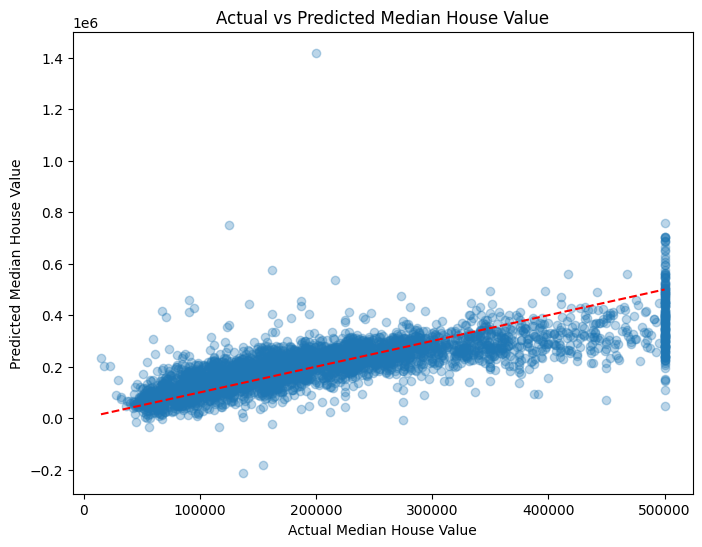

In [126]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test1, y_pred_scaled, alpha=0.3)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted Median House Value")
plt.plot([y_test1.min(), y_test1.max()], [y_test1.min(), y_test1.max()], 'r--')
plt.show()

The same issues with the model post scaling and adding features has the same problem as before with it being able to predict features in the low to medium but failing to predict the larger values. How would I fix this issues and make the model predict more acuate?

Thats all I can think to talk about and add, I hope this fits the assignment description and sorry if it feels messy.